1. Implement the following initial value problem (IVP) solvers:
(a) The forward Euler method
(b) The mid-point method
(c) The Heun method
(d) The RK-4 method

Forward Euler Method:

In [28]:
import numpy as np
import matplotlib.pyplot as plt


def forward_euler(f, t0, tf, y0, h):
    t = np.arange(t0, tf+h, h)
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        y[i] = y[i-1] + h * f(t[i-1], y[i-1])
    return t, y

# defining function for second order derivative 
def forward_euler_second(f, t0, tf, y0, y_prime0, h):
    t = np.arange(t0, tf+h, h)
    n = len(t)
    y = np.zeros(n)
    y_prime = np.zeros(n)
    y[0] = y0
    y_prime[0] = y_prime0
    for i in range(1, n):
        y_prime[i] = y_prime[i-1] + h * f(t[i-1], y[i-1], y_prime[i-1])
        y[i] = y[i-1] + h * y_prime[i-1]
    return t, y

Mid-Point Method:

In [29]:
def midpoint_method(f, t0, tf, y0, h):
    t = np.arange(t0, tf+h, h)
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + h/2, y[i-1] + h/2 * k1)
        y[i] = y[i-1] + h * k2
    return t, y

# defining function for second order derivative 
def midpoint_method_second(f, t0, tf, y0, y_prime0, h):
    t = np.arange(t0, tf+h, h)
    n = len(t)
    y = np.zeros(n)
    y_prime = np.zeros(n)
    y[0] = y0
    y_prime[0] = y_prime0
    for i in range(1, n):
        k1 = f(t[i-1], y[i-1], y_prime[i-1])
        k2 = f(t[i-1] + h/2, y[i-1] + h/2 * y_prime[i-1], y_prime[i-1] + h/2 * k1)
        y_prime[i] = y_prime[i-1] + h * k2
        y[i] = y[i-1] + h * y_prime[i-1]
    return t, y

Heun Method:

In [30]:
def heun_method(f, t0, tf, y0, h):
    t = np.arange(t0, tf+h, h)
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + h, y[i-1] + h * k1)
        y[i] = y[i-1] + h/2 * (k1 + k2)
    return t, y

# defining function for second order derivative 
def heun_method_second(f, t0, tf, y0, y_prime0, h):
    t = np.arange(t0, tf+h, h)
    n = len(t)
    y = np.zeros(n)
    y_prime = np.zeros(n)
    y[0] = y0
    y_prime[0] = y_prime0
    for i in range(1, n):
        k1 = f(t[i-1], y[i-1], y_prime[i-1])
        k2 = f(t[i-1] + h, y[i-1] + h * y_prime[i-1], y_prime[i-1] + h * k1)
        y_prime[i] = y_prime[i-1] + h/2 * (k1 + k2)
        y[i] = y[i-1] + h * y_prime[i-1]
    return t, y

RK-4 Method:

In [31]:
def rk4_method(f, t0, tf, y0, h):
    t = np.arange(t0, tf+h, h)
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + h/2, y[i-1] + h/2 * k1)
        k3 = f(t[i-1] + h/2, y[i-1] + h/2 * k2)
        k4 = f(t[i-1] + h, y[i-1] + h * k3)
        y[i] = y[i-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, y

# defining function for second order derivative 
def rk4_method_second(f, t0, tf, y0, y_prime0, h):
    t = np.arange(t0, tf+h, h)
    n = len(t)
    y = np.zeros(n)
    y_prime = np.zeros(n)
    y[0] = y0
    y_prime[0] = y_prime0
    for i in range(1, n):
        k1 = f(t[i-1], y[i-1], y_prime[i-1])
        k2 = f(t[i-1] + h/2, y[i-1] + h/2 * y_prime[i-1], y_prime[i-1] + h/2 * k1)
        k3 = f(t[i-1] + h/2, y[i-1] + h/2 * y_prime[i-1] + h/4 * k1, y_prime[i-1] + h/2 * k2)
        k4 = f(t[i-1] + h, y[i-1] + h * y_prime[i-1] + h * k2, y_prime[i-1] + h * k3)
        y_prime[i] = y_prime[i-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        y[i] = y[i-1] + h * y_prime[i-1]
    return t, y

2. Using the above solvers, solve the following IVPs. Play with discretization parameter to get
reliable numerical solution. Plot the solution for different values of the discretization parameter
and for different numerical method. In all cases, interpret your result.

(a) dP/dt = rP(1 − P/K), P(0) = 90. Take r = 5, K = 80. Find the solution for t ∈ [0, 200].

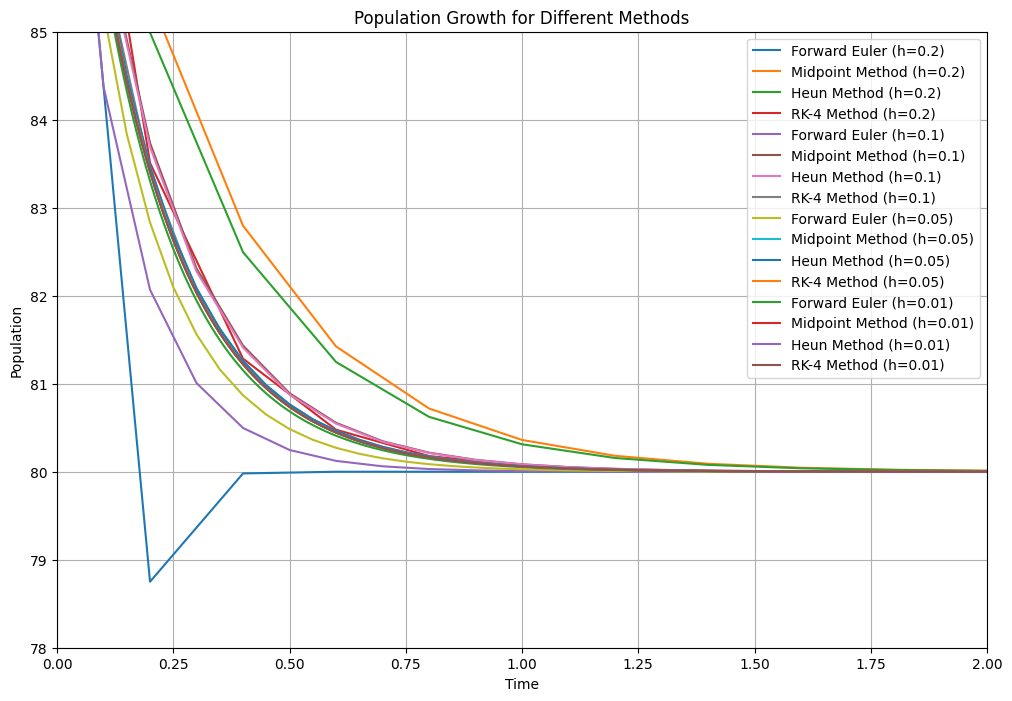

In [47]:
#Define the function for the given IVP
def f(t, P, r, K):
    return r * P * (1 - (P / K))

# Define parameters
r = 5
K = 80
P0 = 90
t0 = 0
tf = 200

# Solve using each method
h_values = [0.2,0.1, 0.05, 0.01]  # Different discretization parameters

plt.figure(figsize=(12, 8))
for h in h_values:
    t_fe, P_fe = forward_euler(lambda t, P: f(t, P, r, K), t0, tf, P0, h)
    t_mm, P_mm = midpoint_method(lambda t, P: f(t, P, r, K), t0, tf, P0, h)
    t_heun, P_heun = heun_method(lambda t, P: f(t, P, r, K), t0, tf, P0, h)
    t_rk4, P_rk4 = rk4_method(lambda t, P: f(t, P, r, K), t0, tf, P0, h)
    
    
    plt.plot(t_fe, P_fe, label=f'Forward Euler (h={h})')
    plt.plot(t_mm, P_mm, label=f'Midpoint Method (h={h})')
    plt.plot(t_heun, P_heun, label=f'Heun Method (h={h})')
    plt.plot(t_rk4, P_rk4, label=f'RK-4 Method (h={h})')
    
    plt.ylim(78,85)
    plt.xlim(0,2)

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Growth for Different Methods')
plt.legend()
plt.grid(True)
plt.show()



From the graph, it can be seen that as the descretization parameter decreases, the numerical solutions become closer to the analytical solution. This indicates improvement in accuracy.

Out of all the methods, RK-4 tends to provide the most accurate result for a given descretization parameter, followed by Heun method, Mid point method and then Forward Euler method.

(b) my′′ + cy′ + ky = 0, y(0) = 0, y′(0) = 2. Take m = 10, k = 90, c = 10. Take appropriate time interval.

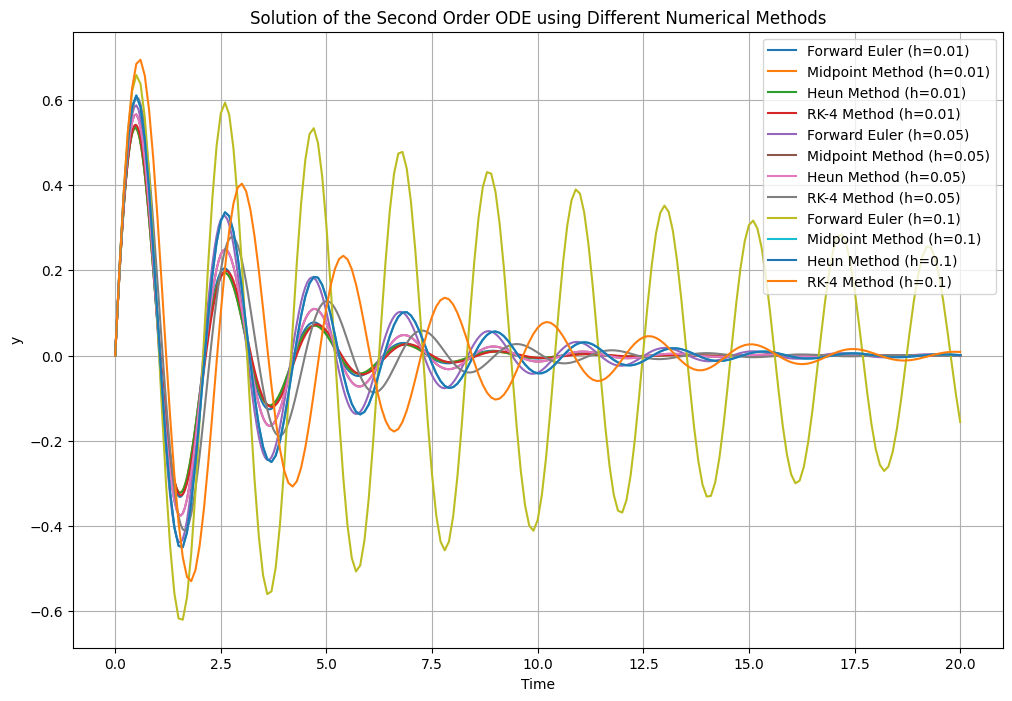

In [15]:
# Define the function for the given IVP
def f(t, y, y_prime, m, c, k):
    return (-c * y_prime - k * y) / m

# Define parameters
m = 10
c = 10
k = 90
y0 = 0
y_prime0 = 2
t0 = 0
tf = 20

# Solve using each method
h_values = [0.01, 0.05, 0.1]  # Different discretization parameters

plt.figure(figsize=(12, 8))

for h in h_values:
    t_fe, y_fe = forward_euler_second(lambda t, y, y_prime: f(t, y, y_prime, m, c, k), t0, tf, y0, y_prime0, h)
    t_mm, y_mm = midpoint_method_second(lambda t, y, y_prime: f(t, y, y_prime, m, c, k), t0, tf, y0, y_prime0, h)
    t_heun, y_heun = heun_method_second(lambda t, y, y_prime: f(t, y, y_prime, m, c, k), t0, tf, y0, y_prime0, h)
    t_rk4, y_rk4 = rk4_method_second(lambda t, y, y_prime: f(t, y, y_prime, m, c, k), t0, tf, y0, y_prime0, h)

    plt.plot(t_fe, y_fe, label=f'Forward Euler (h={h})')
    plt.plot(t_mm, y_mm, label=f'Midpoint Method (h={h})')
    plt.plot(t_heun, y_heun, label=f'Heun Method (h={h})')
    plt.plot(t_rk4, y_rk4, label=f'RK-4 Method (h={h})')

plt.xlabel('Time')
plt.ylabel('y')
plt.title('Solution of the Second Order ODE using Different Numerical Methods')
plt.legend()
plt.grid(True)
plt.show()

From this graph also, we can conclude that as the descretization parameter decreases, the numerical solutions become closer to the analytical solution. This indicates improvement in accuracy.

Out of all the methods, RK-4 tends to provide the most accurate result for a given descretization parameter, followed by Heun method, Mid point method and then Forward Euler method.

(c) x ̈ + μ(x2 − 1)  ̇x + x = 0. x(0) = 0, x ̇(0) = 2. Take μ = 0, 2, −2. Take appropriate time interval.

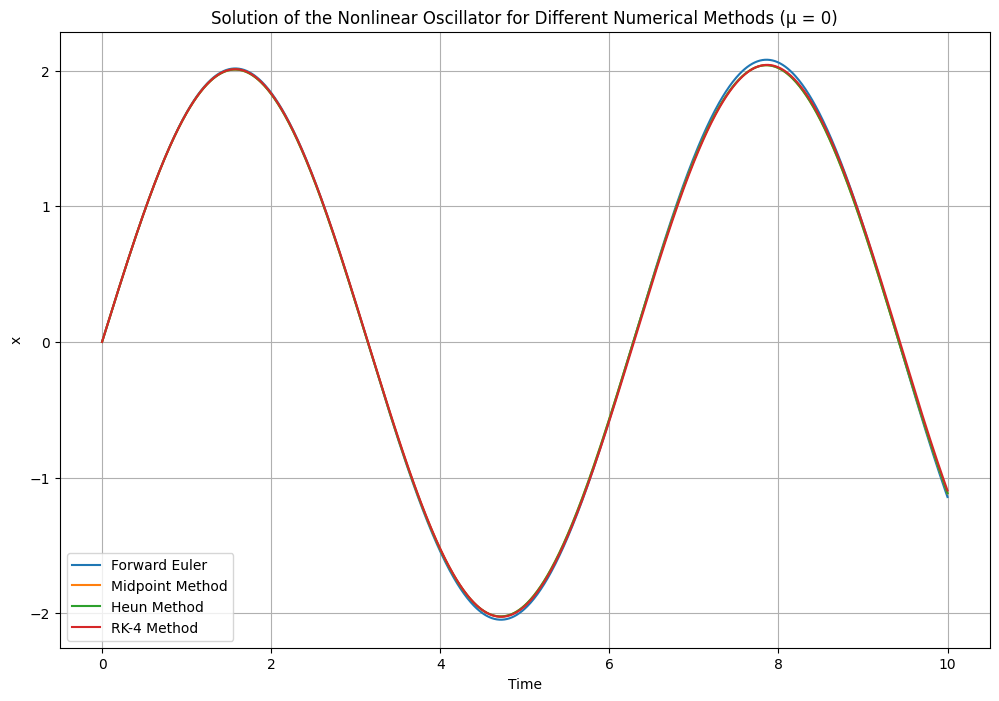

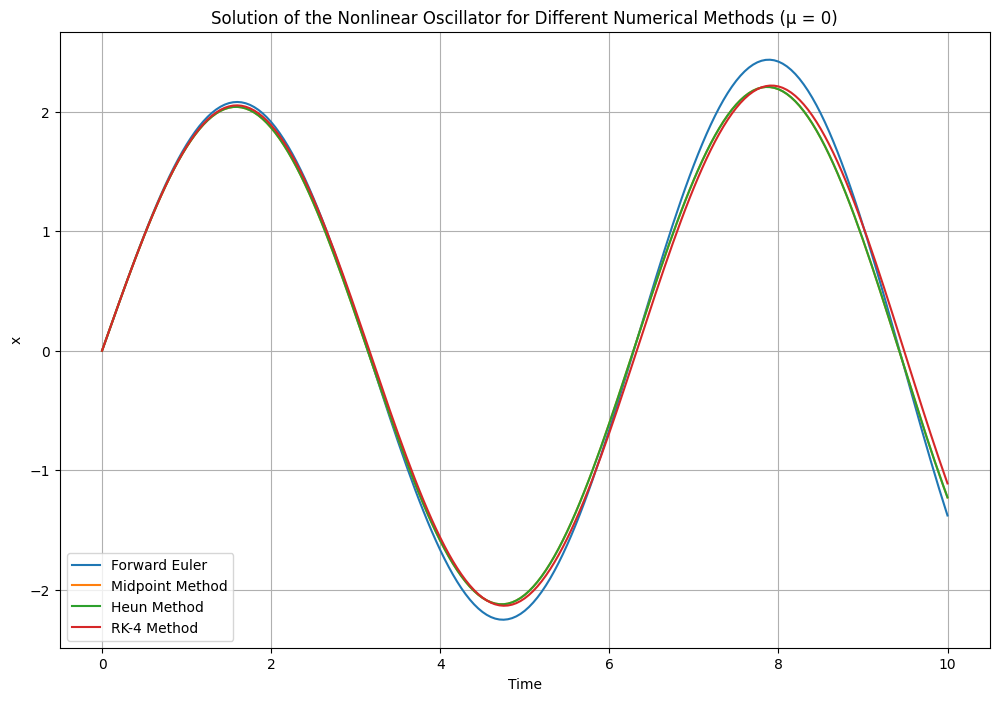

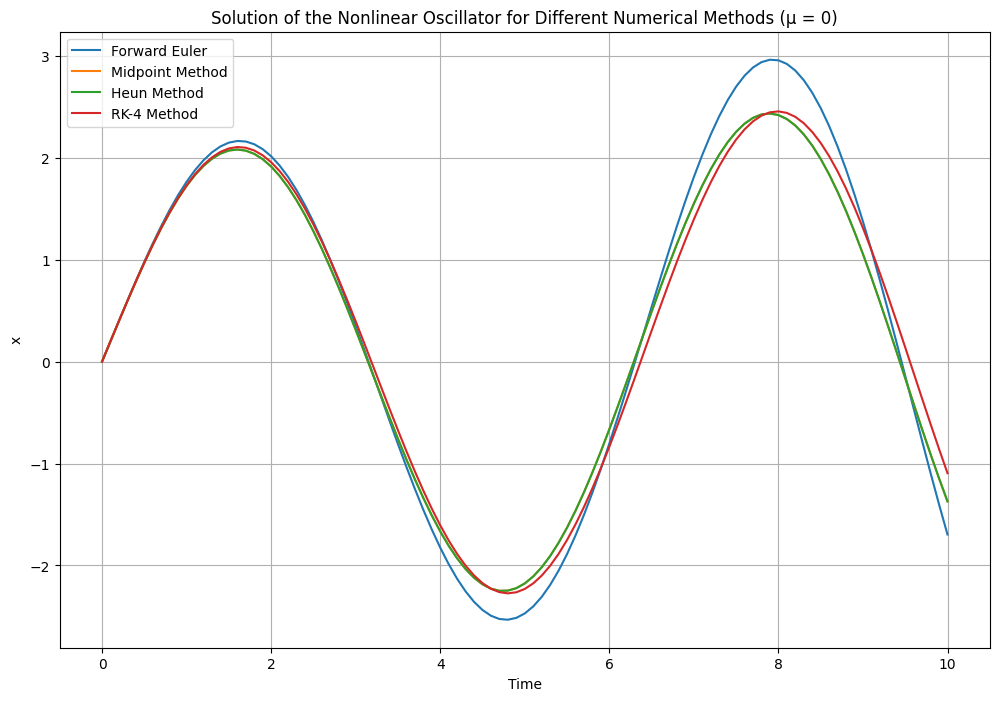

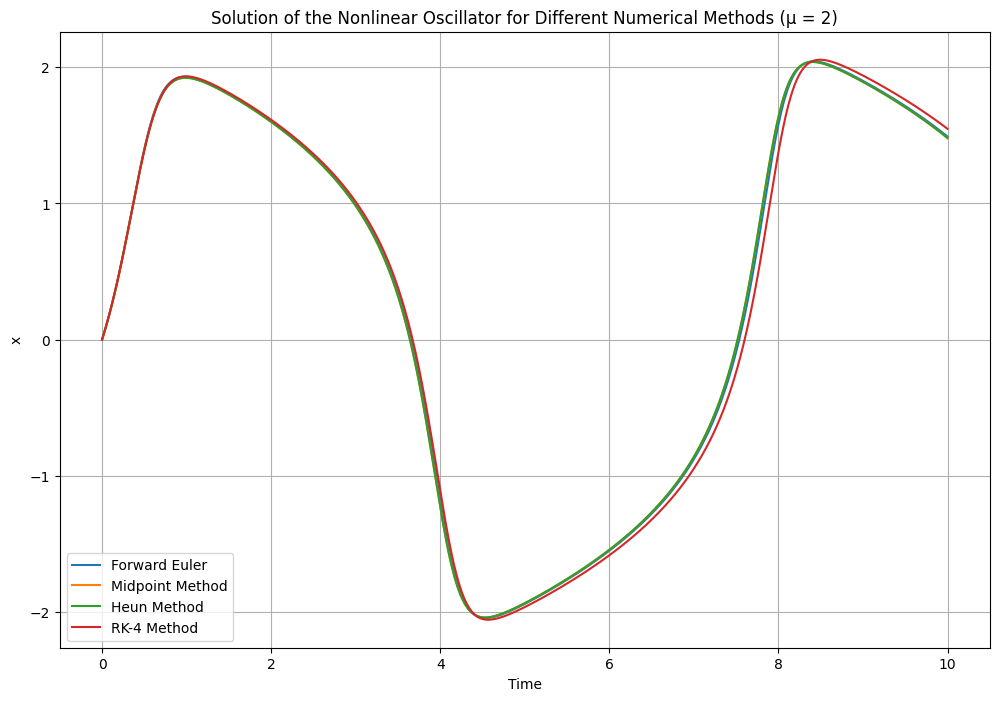

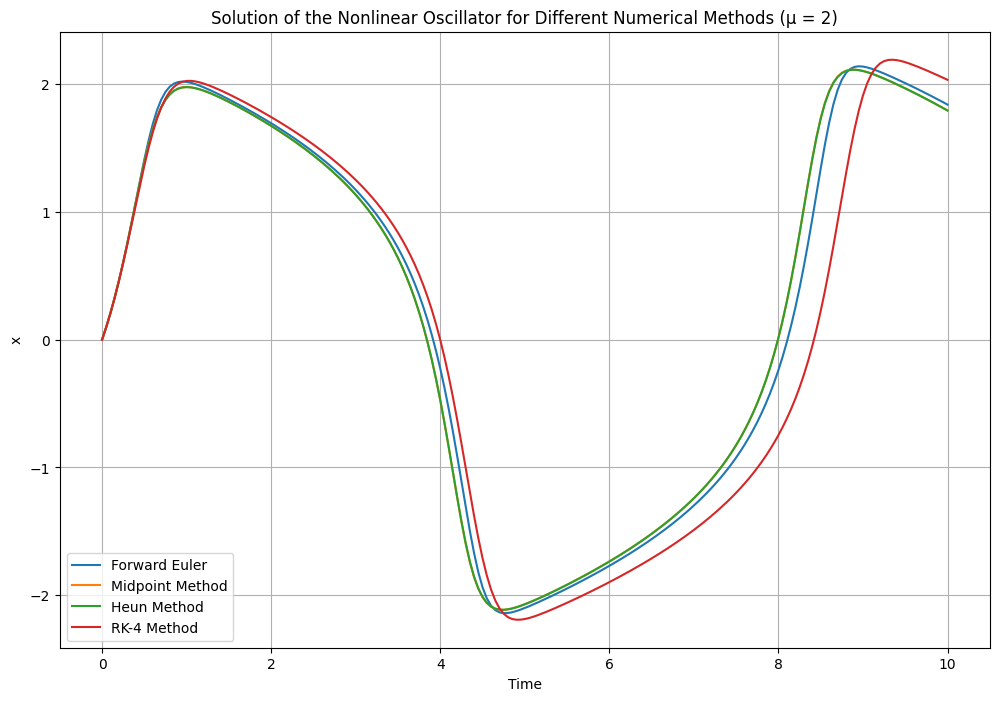

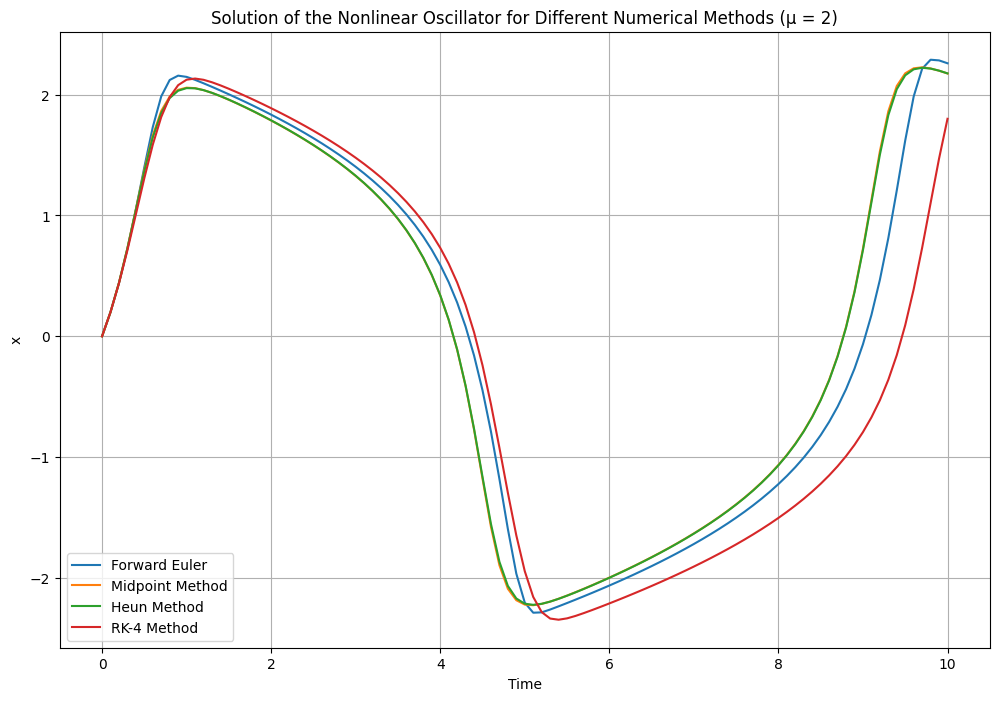

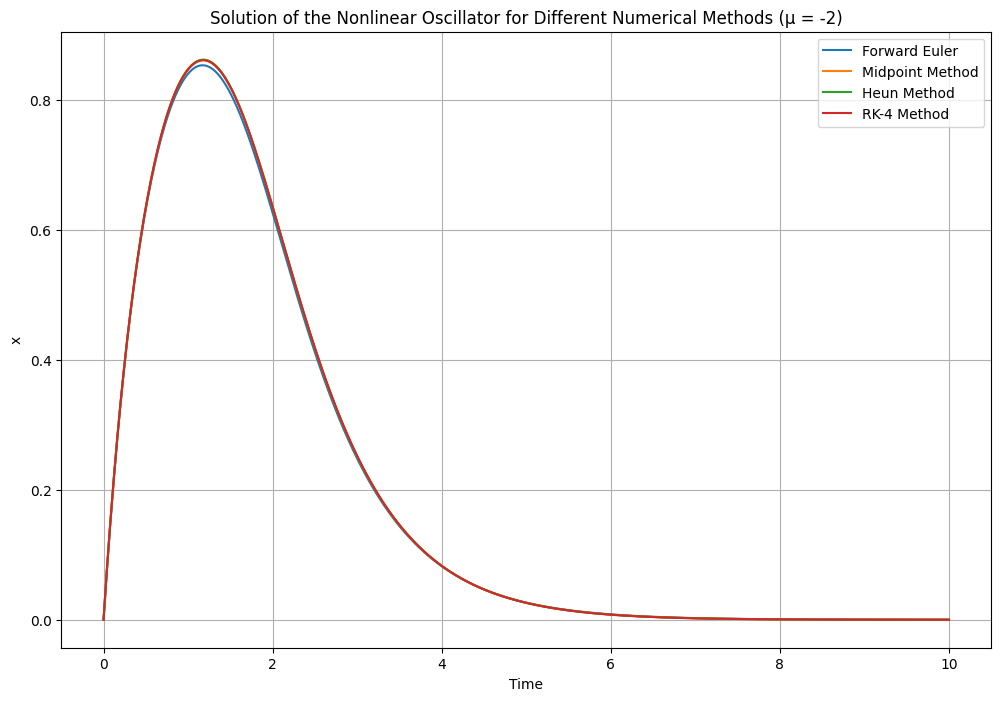

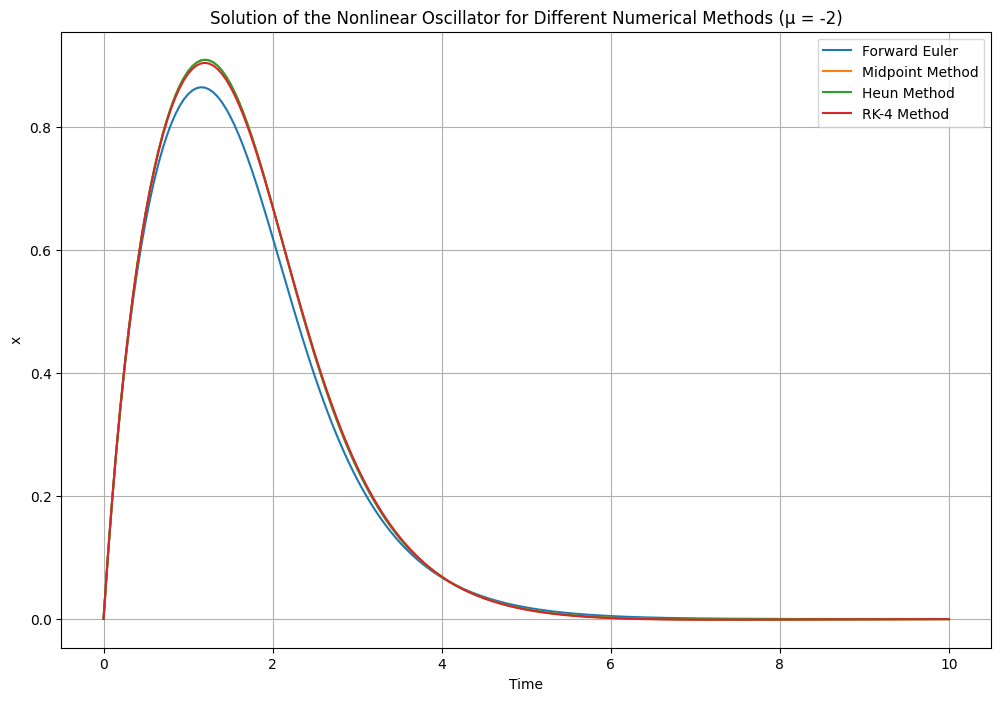

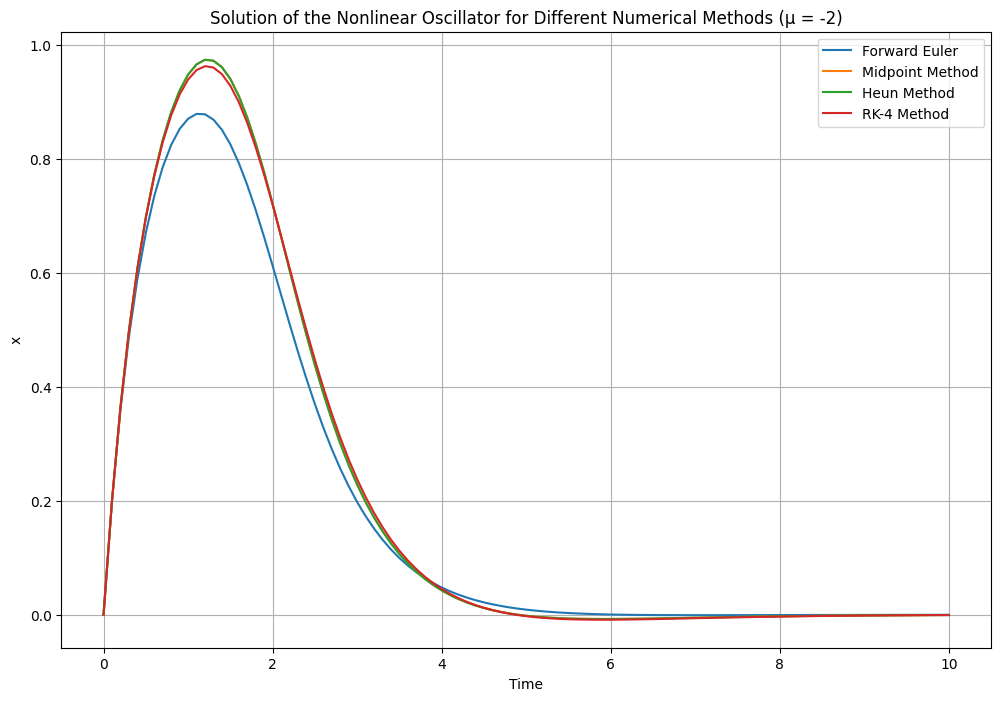

In [17]:
def nonlinear_oscillator(mu, x0, x_prime0, t0, tf, h):
    def f(t, x, x_prime):
        return -mu * (x**2 - 1) * x_prime - x

    t_fe, x_fe = forward_euler_second(lambda t, x, x_prime: f(t, x, x_prime), t0, tf, x0, x_prime0, h)
    t_mm, x_mm = midpoint_method_second(lambda t, x, x_prime: f(t, x, x_prime), t0, tf, x0, x_prime0, h)
    t_heun, x_heun = heun_method_second(lambda t, x, x_prime: f(t, x, x_prime), t0, tf, x0, x_prime0, h)
    t_rk4, x_rk4 = rk4_method_second(lambda t, x, x_prime: f(t, x, x_prime), t0, tf, x0, x_prime0, h)

    plt.figure(figsize=(12, 8))
    plt.plot(t_fe, x_fe, label='Forward Euler')
    plt.plot(t_mm, x_mm, label='Midpoint Method')
    plt.plot(t_heun, x_heun, label='Heun Method')
    plt.plot(t_rk4, x_rk4, label='RK-4 Method')

    plt.xlabel('Time')
    plt.ylabel('x')
    plt.title('Solution of the Nonlinear Oscillator for Different Numerical Methods (μ = {})'.format(mu))
    plt.legend()
    plt.grid(True)
    plt.show()

mu_values = [0, 2, -2]
x0 = 0
x_prime0 = 2
t0 = 0
tf = 10
h_values = [0.01, 0.05, 0.1]
for mu in mu_values:
    for h in h_values:
        nonlinear_oscillator(mu, x0, x_prime0, t0, tf, h)

3. Solve the above equations using the in-built RK4 method. Discuss your observations.

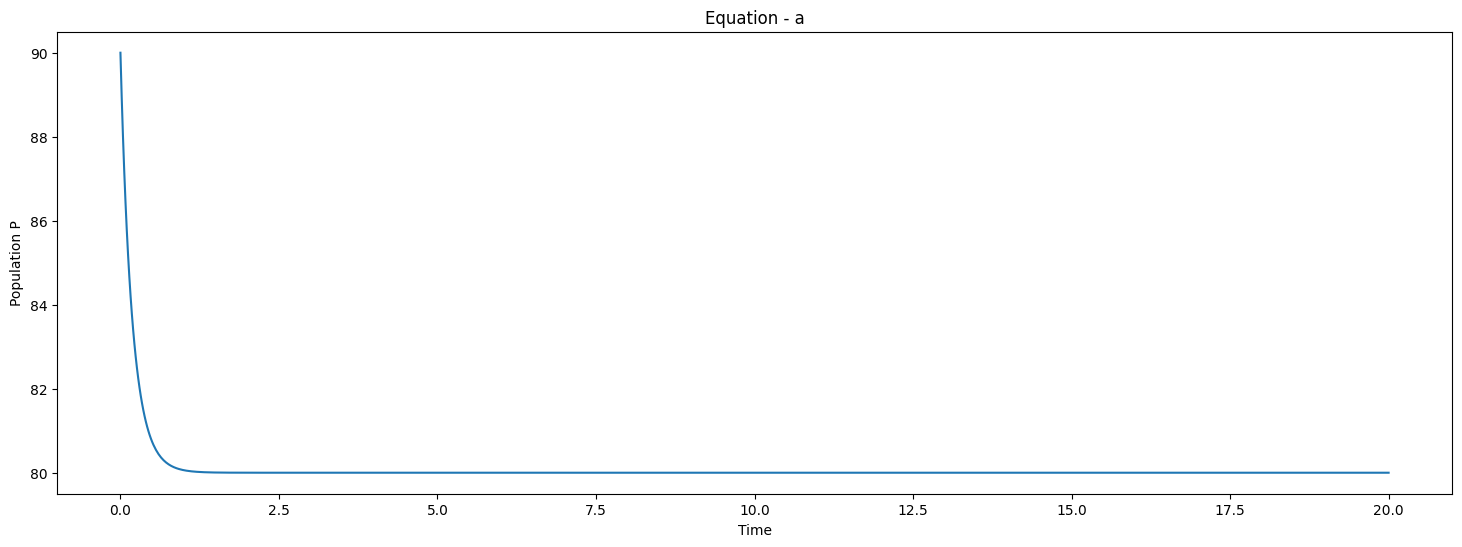

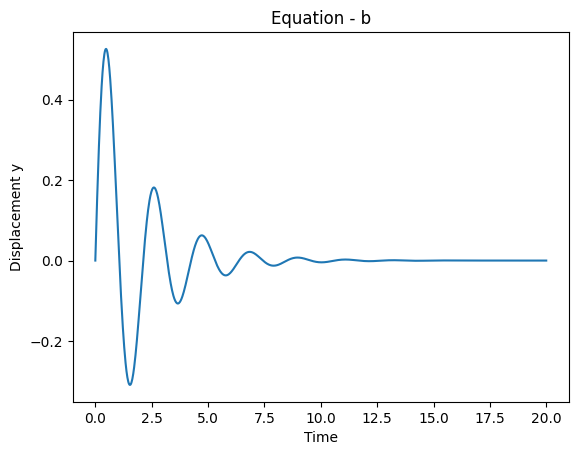

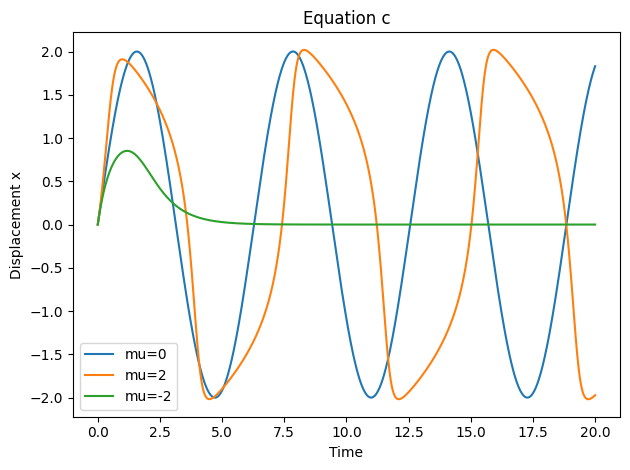

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# a) Logistic Growth Equation
def logistic_growth(t, P, r, K):
    return r * P * (1 - P / K)

# b) Damped Harmonic Oscillator
def damped_oscillator(t, y, m, c, k):
    return [y[1], -(c/m)*y[1] - (k/m)*y[0]]

# c) Nonlinear Oscillator
def nonlinear_oscillator(t, x, mu):
    return [x[1], -mu*(x[0]**2 - 1)*x[1] - x[0]]

# Parameters
r, K = 5, 80
m, c, k = 10, 10, 90
mu_values = [0, 2, -2]

# Initial conditions and time spans
P0 = [90]
y0 = [0, 2]
x0 = [0, 2]
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Solve equations
sol_a = solve_ivp(logistic_growth, t_span, P0, args=(r, K), method='RK45', t_eval=t_eval, max_step=0.1)
sol_b = solve_ivp(damped_oscillator, t_span, y0, args=(m, c, k), method='RK45', t_eval=t_eval)

# Plot solutions
plt.figure(figsize=(18, 6))

# Plot a
#plt.subplot(1, 3, 1)
plt.plot(sol_a.t, sol_a.y[0])
plt.title('Equation - a')
plt.xlabel('Time')
plt.ylabel('Population P')
plt.show()

# Plot b
#plt.subplot(1, 3, 2)
plt.plot(sol_b.t, sol_b.y[0])
plt.title('Equation - b')
plt.xlabel('Time')
plt.ylabel('Displacement y')
plt.show()

# Plot c for different mu values
for mu in mu_values:
    sol_c = solve_ivp(nonlinear_oscillator, t_span, x0, args=(mu,), method='RK45', t_eval=t_eval)
    #plt.subplot(1, 3, 3)
    plt.plot(sol_c.t, sol_c.y[0], label=f'mu={mu}')
    plt.title('Equation c')
    plt.xlabel('Time')
    plt.ylabel('Displacement x')
    plt.legend()

plt.tight_layout()
plt.show()

Upon observing the plots generated by solving the differential equations using the RK4 method, we can make several observations:

1. Population Growth (dP/dt):
* For the logistic growth equation dP = rP(1 - F), where P represents population, r represents the growth rate, and K represents the carrying capacity:
* The population increases initially but eventually levels off as it approaches the carrying capacity K.
* The rate of growth decreases as the population approaches the carrying capacity.

2. Second-Order Differential Equation (my" + cy' + ky = 0):
* The solution to this equation represents the behavior of a second-order linear system with damping and stiffness.
* Depending on the parameters m, c, and k, the system may exhibit underdamped, critically damped, or overdamped behavior.
* The damping coefficient c affects the rate at which the system's oscillations decay, while the stiffness coefficient k affects the system's natural frequency.

3. Nonlinear Oscillator (x" + 4(x^2 - 1)x' + x = 0):
* The solution to this equation represents the behavior of a nonlinear oscillator.
* The term x^2 - 1 introduces nonlineari & to the system, causing deviations from simple harmonic motion.
* Depending on the value of j, the oscillator may exhibit different behaviors, including stable oscillations, chaotic behavior, or decay to equilibrium.

Overall, the RK4 method provides accurate numerical solutions to the differential equations, allowing us to observe and analyze the dynamic behavior of the systems described by these equations.